In [2]:
# 1 important drivers for a heart disease or attack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# Class imbalance techniques
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#load dataset
df = pd.read_csv('heartdisease.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

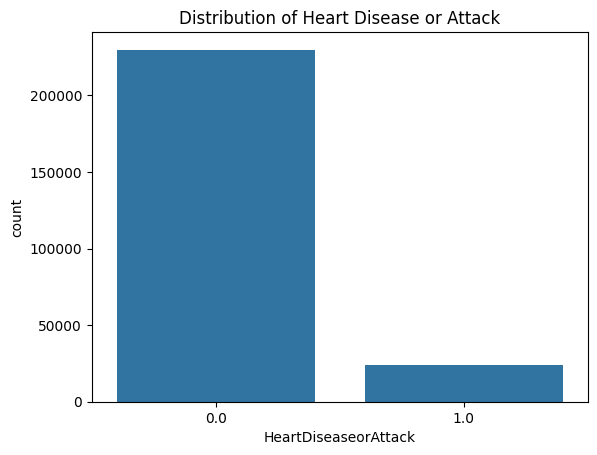

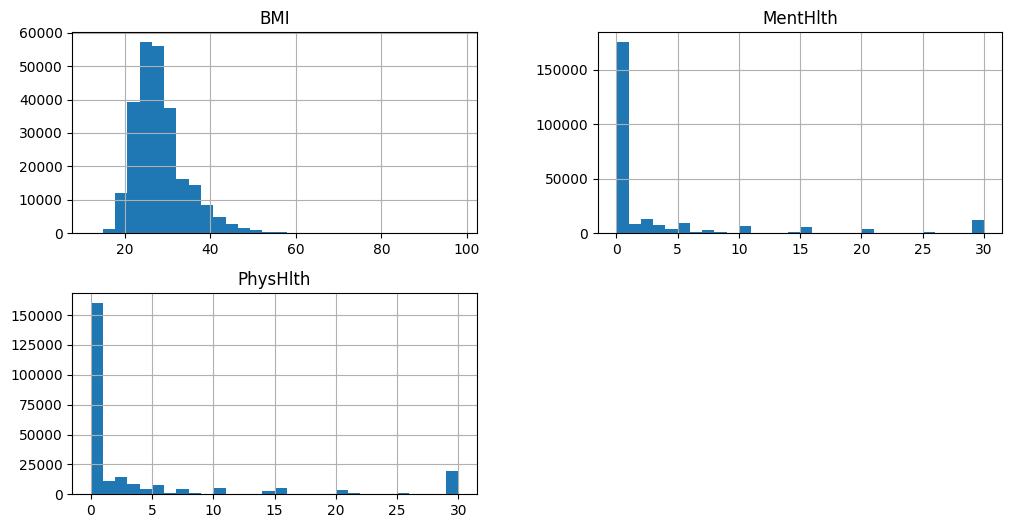

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64


HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64


Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64


Diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64


Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64


HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64


Sex
0.0    141974
1.0    111706
Name: count, dtype: int64




In [3]:
#2 EDA
#2.1 Univariate analysis: Look at distributions of numeric features
# Checking target distribution
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title('Distribution of Heart Disease or Attack')
plt.show()

# Histograms for numeric features
numeric_features = ['BMI', 'MentHlth', 'PhysHlth']
df[numeric_features].hist(bins=30, figsize=(12, 6))
plt.show()

# Value counts for binary/categorical features
binary_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex']
for feature in binary_features:
    print(df[feature].value_counts())
    print("\n")

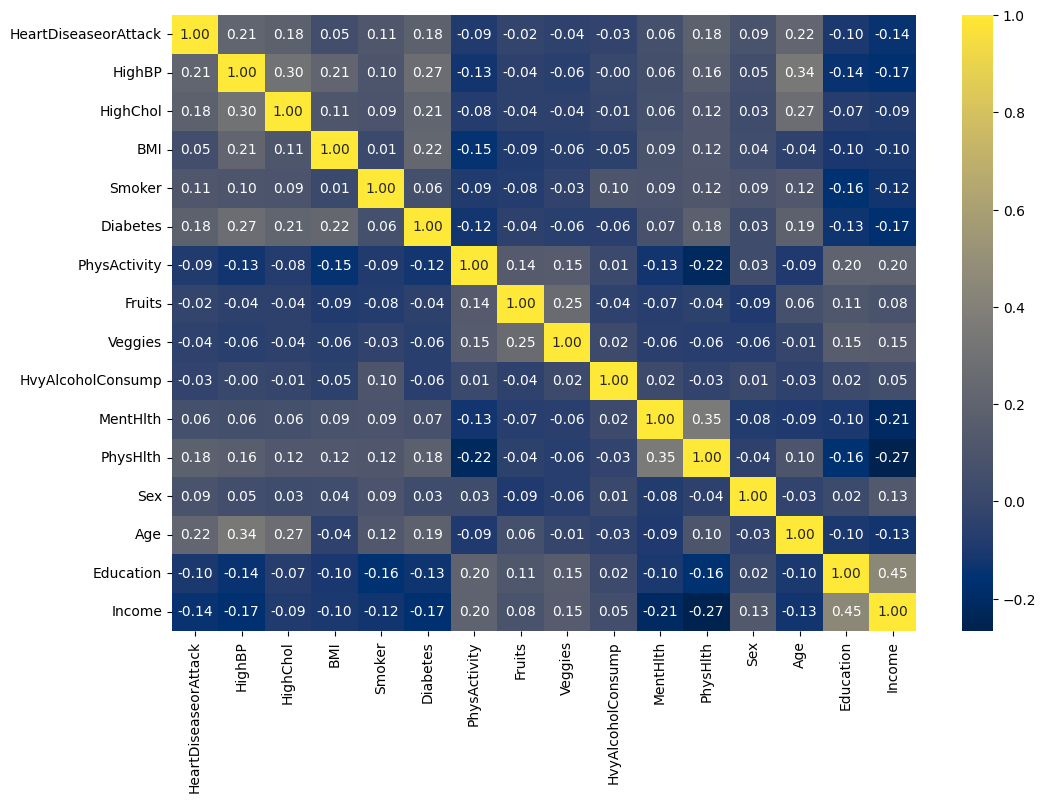

<ipython-input-4-0736c35d1347>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDiseaseorAttack', palette='Set2')


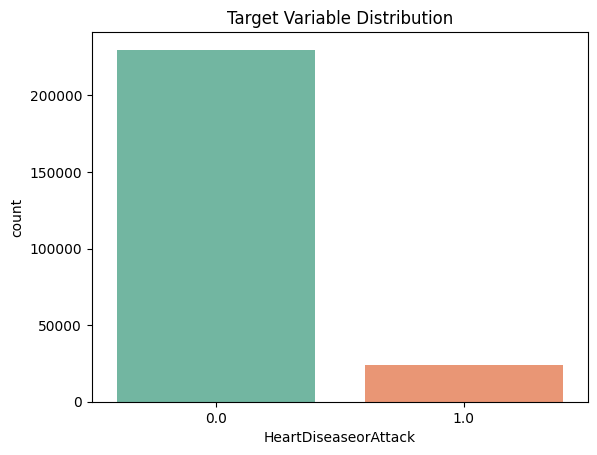

In [4]:
#2.2 multivariate analysis
# Correlation heatmap to see the relationship between numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='cividis', fmt='.2f')
plt.show()

# Visualize the target variable against other features
sns.countplot(data=df, x='HeartDiseaseorAttack', palette='Set2')
plt.title("Target Variable Distribution")
plt.show()


In [5]:
##2.3 Example of a new feature: "Health Index"
df['Obese'] = (df['BMI'] > 30).astype(int)
df['Unhealthy_Score'] = (df['Smoker'] + df['HvyAlcoholConsump'] + (1 - df['Fruits']) + (1 - df['Veggies']))
df['PoorHealth'] = ((df['MentHlth'] > 10) & (df['PhysHlth'] > 10)).astype(int)
df['ChronicCond'] = (df['HighBP'] + df['HighChol'] + df['Diabetes'])

# Quick check
df[['Obese', 'Unhealthy_Score', 'PoorHealth', 'ChronicCond']].head()

,Obese,Unhealthy_Score,PoorHealth,ChronicCond
0,1,2.0,1,2.0
1,0,3.0,0,0.0
2,0,1.0,1,2.0
3,0,0.0,0,1.0
4,0,0.0,0,2.0


In [14]:
# 2.4 Layout binary classification experimentation space
# Install libraries if needed (for XGBoost, LightGBM, CatBoost)
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Example: Load sample dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (especially useful for SVM, KNN, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "F1 Score": round(f1, 4),
        "ROC AUC": round(roc_auc, 4) if not np.isnan(roc_auc) else "N/A"
    })

# Show results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)


                 Model  Accuracy  F1 Score  ROC AUC
2        Random Forest     0.910    0.9091   0.9584
3    Gradient Boosting     0.910    0.9062   0.9488
4              XGBoost     0.905    0.9005   0.9660
0  Logistic Regression     0.885    0.8844   0.9338
5                  SVM     0.880    0.8763   0.9365
1        Decision Tree     0.865    0.8615   0.8650
7          Naive Bayes     0.845    0.8360   0.9133
6                  KNN     0.770    0.7604   0.8592


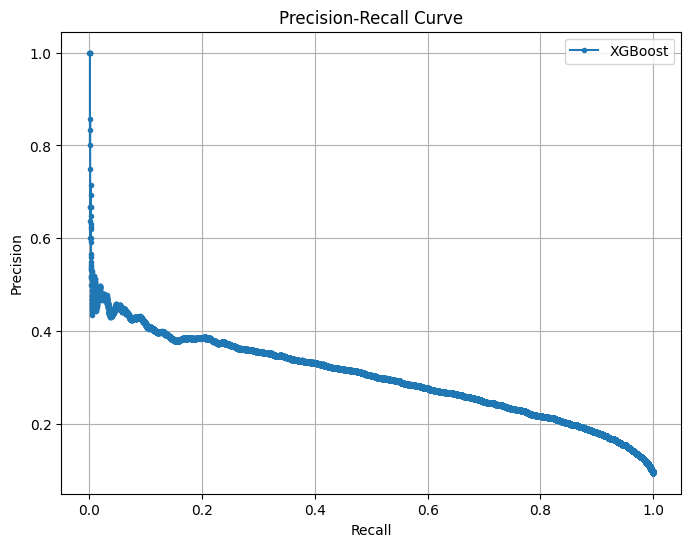

Best Threshold = 0.2185
Best F1 Score at this Threshold = 0.3810


In [9]:
# 3 Using precision-recall curves to determine best threshold
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities from your best model (example: xgb_pipeline)
y_scores = xgb_pipeline.predict_proba(X_test)[:,1]

# Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Find the best threshold (you can maximize F1 Score)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"Best Threshold = {best_threshold:.4f}")
print(f"Best F1 Score at this Threshold = {best_f1:.4f}")


In [2]:
#4 Publish the performance of all the models on the same hold-out/ test dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df = pd.read_csv('heartdisease.csv')
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]  # for AUC
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    }
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Decision Tree,0.849397,0.221595,0.238334,0.229660,0.580249
Random Forest,0.896681,0.313457,0.081398,0.129236,0.783038
Logistic Regression,0.904565,0.451464,0.061310,0.107959,0.824123
XGBoost,0.904190,0.429795,0.052521,0.093604,0.821953


In [8]:
##5 list out the most important drivers of heart disease or attack.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Using Random Forest for feature importance
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

features = X.columns

# Display the most important features
print("Most Important Features:")
for i in range(len(features)):
    print(f"{features[indices[i]]}: {importances[indices[i]]}")

Most Important Features:
BMI: 0.22002942824133204
Age: 0.12272101540388544
Income: 0.11904704844567476
PhysHlth: 0.10371147276174293
Education: 0.08367608325663566
MentHlth: 0.07250512507982988
ChronicCond: 0.04374744866981287
Unhealthy_Score: 0.03794333113318328
PhysActivity: 0.031983283793103286
Sex: 0.02438385016921149
Fruits: 0.021638297496212336
Obese: 0.019472490954812623
HighBP: 0.019202184140011708
Veggies: 0.019159758048237524
Diabetes: 0.016991731998418143
Smoker: 0.015545691513066529
HighChol: 0.014858777626238067
HvyAlcoholConsump: 0.007360674788284171
PoorHealth: 0.006022306480307243


In [10]:
# 6 Using techniques such as oversampling, undersampling to handle class-imbalance
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming 'df'
df = pd.read_csv('heartdisease.csv')
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#now u can use SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Now undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check new balance
pd.Series(y_train_rus).value_counts(normalize=True) * 100
# re-define the 'models' dictionary here
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Check new balance
pd.Series(y_train_smote).value_counts(normalize=True) * 100
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    }

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.733168,0.228302,0.770036,0.352187,0.822511
Decision Tree,0.844174,0.214846,0.246495,0.229585,0.580407
Random Forest,0.891399,0.293852,0.109019,0.159035,0.781646
XGBoost,0.902416,0.398585,0.070726,0.120135,0.819368


In [6]:
#Using model pipeline to create end to end training and inference pipelines.
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load dataset
df = pd.read_csv('heartdisease.csv')

# Features and target
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define Pipeline
logreg_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# (Optional) Use smaller sample for faster testing
# X_train = X_train.sample(frac=0.3, random_state=42)
# y_train = y_train.loc[X_train.index]

# Fit Pipeline
logreg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = logreg_pipeline.predict(X_test)
y_prob = logreg_pipeline.predict_proba(X_test)[:,1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Show Results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Define XGBoost pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),   # Feature scaling
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Handle imbalance
     ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])
xgb_pipeline.fit(X_train, y_train)
# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:,1]
# Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Precision: {precision:.4f}')
print(f'XGBoost Recall: {recall:.4f}')
print(f'XGBoost F1 Score: {f1:.4f}')
print(f'XGBoost ROC AUC: {roc_auc:.4f}')

Accuracy: 0.8290
Precision: 0.2920
Recall: 0.5723
F1 Score: 0.3867
ROC AUC: 0.8239
XGBoost Accuracy: 0.9044
XGBoost Precision: 0.4432
XGBoost Recall: 0.0580
XGBoost F1 Score: 0.1025
XGBoost ROC AUC: 0.8220
